## 课后习题实例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 导入数据

In [2]:
data = np.array([[2,10],[2,5,],[8,4,],[5,8],[7,5],[6,4],[1,2],[4,9]])

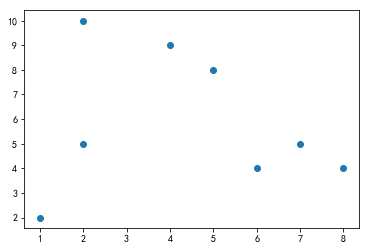

In [3]:
plt.scatter(data[:,0],data[:,1])

### 计算各点到给定质心的距离

In [4]:
from numpy.linalg import norm

In [5]:
a = np.linalg.norm(data - data[0,:] ,axis=1)
b = np.linalg.norm(data - data[3,:] ,axis=1)
c = np.linalg.norm(data - data[6,:] ,axis=1)

In [6]:
dis = np.vstack([a,b,c])
dis

array([[ 0.        ,  5.        ,  8.48528137,  3.60555128,  7.07106781,
         7.21110255,  8.06225775,  2.23606798],
       [ 3.60555128,  4.24264069,  5.        ,  0.        ,  3.60555128,
         4.12310563,  7.21110255,  1.41421356],
       [ 8.06225775,  3.16227766,  7.28010989,  7.21110255,  6.70820393,
         5.38516481,  0.        ,  7.61577311]])

### 根据距离对数据归类

In [7]:
label = np.argmin(dis, axis=0)
label

array([0, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

### 找到新的簇的质心

In [8]:
k_cluster_center = np.zeros([3,2])
for i in label:
    k_cluster_center[i,:] = np.mean(data[label==i,:], axis=0)

In [9]:
k_cluster_center

array([[  2. ,  10. ],
       [  6. ,   6. ],
       [  1.5,   3.5]])

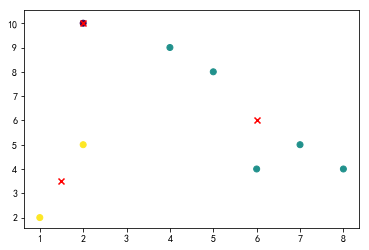

In [10]:
plt.scatter(data[:,0], data[:,1], c=label)
plt.scatter(k_cluster_center[:,0], k_cluster_center[:,1],c='r', marker='x');

### 聚类

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.labels_

array([0, 2, 1, 0, 1, 1, 2, 0])

In [13]:
kmeans.cluster_centers_

array([[ 3.66666667,  9.        ],
       [ 7.        ,  4.33333333],
       [ 1.5       ,  3.5       ]])

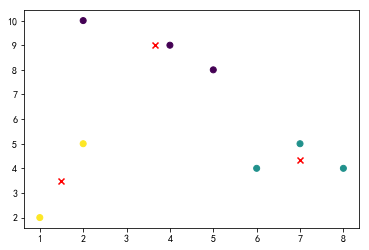

In [14]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='r', marker='x');

## 啤酒实例

### 导入数据

In [15]:
df = pd.read_csv('data14-02.csv',index_col=0)
df.head()

,calorie,sodium,alcohol,cost
beername,,,,
Budweiser,144,19,4.7,0.43
Schlitz,181,19,4.9,0.43
Ionenbrau,157,15,4.9,0.48
Kronensourc,170,7,5.2,0.73
Heineken,152,11,5.0,0.77


### 可视化

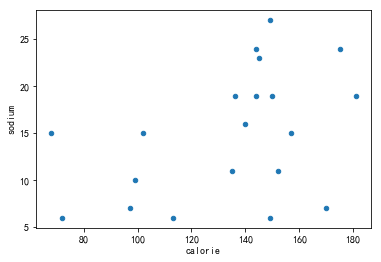

In [16]:
columns = df.columns
df.plot.scatter(columns[0], columns[1])

### 标准化

In [17]:
from sklearn.preprocessing import scale
df[columns] = scale(df)
df.head()

,calorie,sodium,alcohol,cost
beername,,,,
Budweiser,0.324578,0.616563,0.351095,-0.452314
Schlitz,1.513625,0.616563,0.621168,-0.452314
Ionenbrau,0.742351,0.007612,0.621168,-0.101683
Kronensourc,1.160124,-1.210290,1.026278,1.651473
Heineken,0.581669,-0.601339,0.756205,1.931978


### 聚类

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_ 

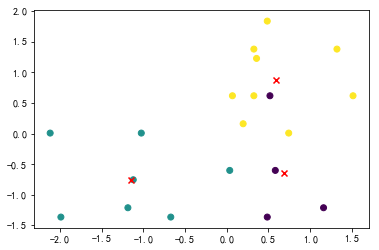

In [19]:
data2 = df.values
plt.scatter(data2[:, 0], data2[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='r', marker='x')

### PCA降维后可视化

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(data2)
centers_ = pca.transform(centers)

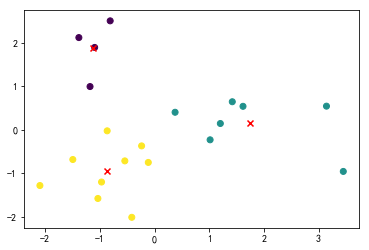

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers_[:, 0], centers_[:, 1], c='r', marker='x')